# Assignment 01

- name: Ran Arino
- student iD: 153073200
- course: Predictive Analysis

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
origin = {
    "Growing_Time": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "Dry_Weight": [16,33,65,97,121,326,386,520,590,651,724,699,989,637,718]
}
df = pd.DataFrame(origin)
df

,Growing_Time,Dry_Weight
0,1,16
1,2,33
2,3,65
3,4,97
4,5,121
5,6,326
6,7,386
7,8,520
8,9,590
9,10,651


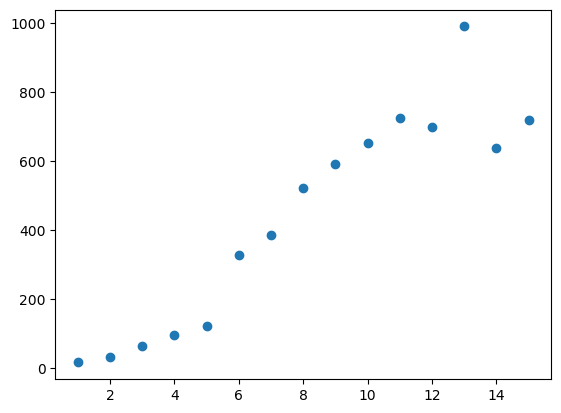

In [9]:
# draw scatter
plt.scatter(df["Growing_Time"], df["Dry_Weight"])

[-17.59166667  47.51190476 112.61547619 177.71904762 242.82261905
 307.92619048 373.0297619  438.13333333 503.23690476 568.34047619
 633.44404762 698.54761905 763.65119048 828.7547619  893.85833333]

- Based on the scatter pot between two variables, we can see somewhat linear relationship.
- However, a linear model won't be able to capture the behaviour of a target variable as the "Growing Time" increases.
- Other non-linear models, such as polynomial, may be possible to explain the behaviour of the target variable.
- Thus, I conclude that a linear model is not a good representative in this case. 



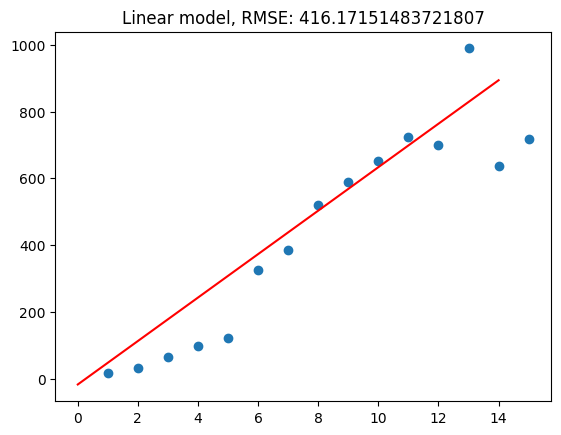

In [43]:
# fit linear model
ln_model = LinearRegression()
ln_model.fit(df[["Growing_Time"]], df["Dry_Weight"])
Yhat_ln = ln_model.predict(df[["Growing_Time"]])
print(Yhat_ln)
rmse_d1 = sum((Yhat_ln - list(df["Dry_Weight"].values))**2)**0.5
plt.plot(Yhat_ln, color='red')
plt.scatter(df["Growing_Time"], df["Dry_Weight"])
plt.title(f"Linear model, RMSE: {rmse_d1}")

print("""
- Based on the scatter pot between two variables, we can see somewhat linear relationship.
- However, a linear model won't be able to capture the behaviour of a target variable as the "Growing Time" increases.
- Other non-linear models, such as polynomial, may be possible to explain the behaviour of the target variable.
- Thus, I conclude that a linear model is not a good representative in this case. 
""")

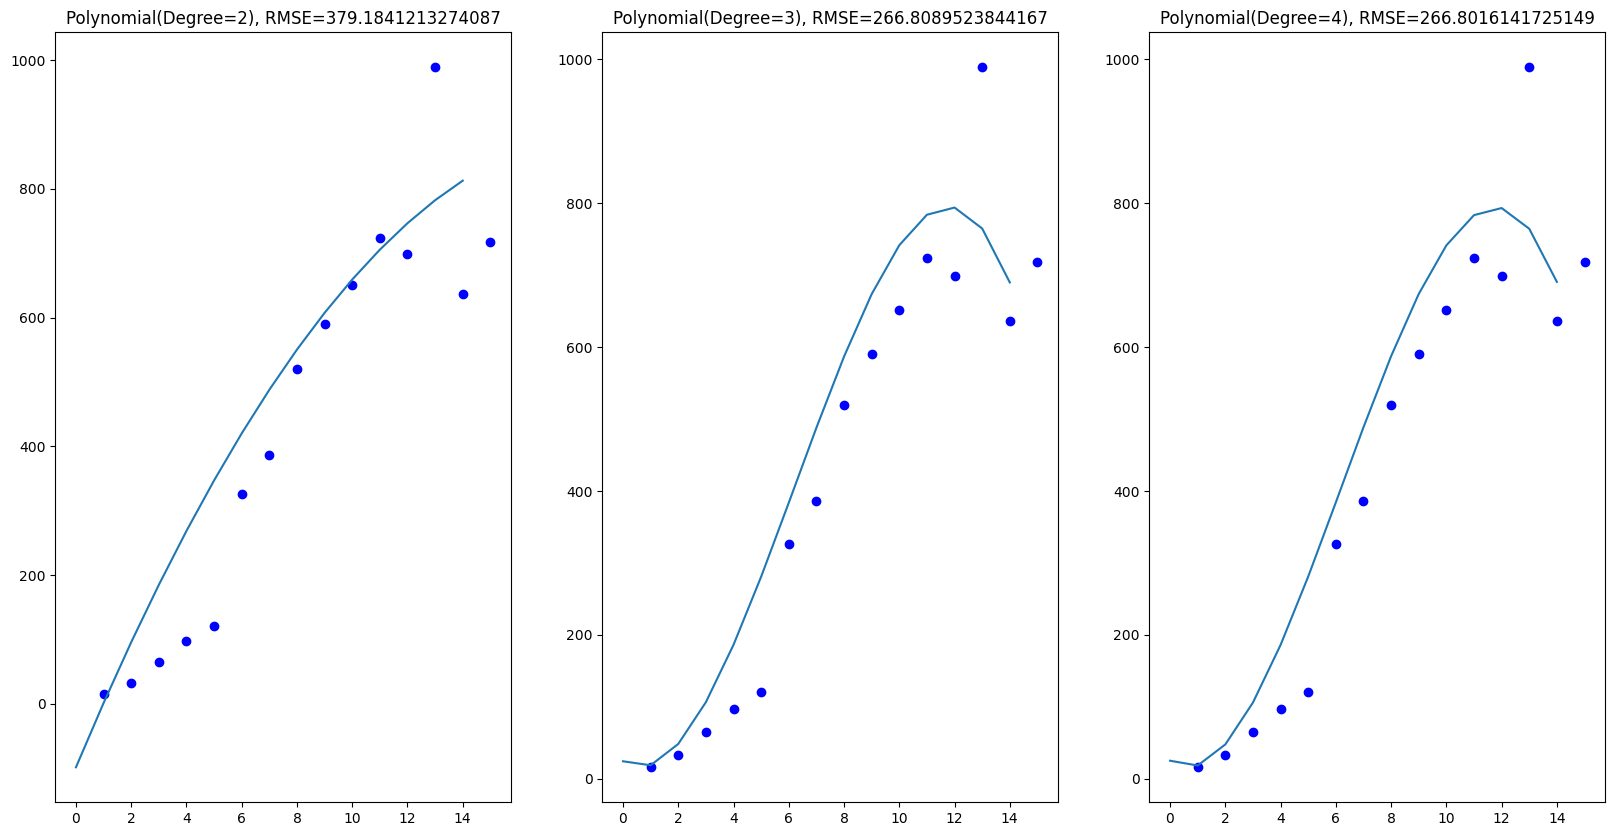

In [50]:
# fit non-linear regression models

degrees = [2,3,4]
X = df[["Growing_Time"]]
Y = df["Dry_Weight"]

rmse_dict = {}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

for i, d in enumerate(degrees):
    model = LinearRegression()
    poly_model = PolynomialFeatures(d)
    poly_X = poly_model.fit_transform(X)
    model.fit(poly_X, Y)
    Yhat_ln = model.predict(poly_X)
    # calculate the Root of Mean Squared Error (RMSE)
    actual = list(df["Dry_Weight"].values)
    rmse = sum((Yhat_ln - list(df["Dry_Weight"].values))**2)**0.5
    rmse_dict[d] = rmse
    
    ax[i].scatter(X, Y, color='blue')
    ax[i].plot(Yhat_ln)
    ax[i].set_title(f"Polynomial(Degree={d}), RMSE={rmse}")

In [41]:
print("""
Based on the multiple polynomial model, the degree = 2 is might be better. Here are the reasons;
- The root of mean squared error decreased from the predicted variables of linear model.
- When the polynomial degree is 3 or 4, the model is likely to over-fit to the training data; the regression line begins to decrease when an growing time exceeds around 12.
- Although the model whose polynomial degree is 2 might be under-fitting the data, it would be more generalized model compared to the polynomial degree of 3 or more.
""")


Based on the multiple polynomial model, the degree = 2 is might be better. Here are the reasons;
- The root of mean squared error decreased from the predicted variables of linear model.
- When the polynomial degree is 3 or 4, the model is likely to over-fit to the training data; the regression line begins to decrease when an growing time exceeds around 12.
- Although the model whose polynomial degree is 2 might be under-fitting the data, it would be more generalized model compared to the polynomial degree of 3 or more.



In [46]:
# showing acuracy of the model
print("Root of Mean Squared Errors:")
print(f" Linear(degree=1): {rmse_d1}")
for k in rmse_dict:
    print(f" Polynomial(degree={k}): {rmse_dict[k]}")

Root of Mean Squared Errors:
 Linear(degree=1): 416.17151483721807
 Polynomial(degree=2): 379.1841213274087
 Polynomial(degree=3): 266.8089523844167
 Polynomial(degree=4): 266.8016141725149


In [59]:
# predict dry Weight based on my StudentID
# Choice of the model: Polynomial (degree = 2)
St_ID = 153073200

# Due to the last two digit is "00", I will apply the last three digits (200) to the model
model = LinearRegression()
poly_model = PolynomialFeatures(2)
poly_X = poly_model.fit_transform(X)
model.fit(poly_X, Y)
# show prediction
St_ID_last3 = np.array([200]).reshape(-1, 1)
model.predict(poly_model.fit_transform(St_ID_last3))


array([-85454.14492566])

In [60]:
print("""
- For the other options, we can consider the exponential function.
- It is because we can observe that the a target variables increases expoentially as the time passes.
""")


- For the other options, we can consider the exponential function.
- It is because we can observe that the a target variables increases expoentially as the time passes.

